# Introduction to Exploratory Data Analysis (EDA)

The objective of EDA is to “understand” the data as follows:

1. Confirm if the data is making sense in the context of the business problem.
2. Get insights into the data summary.
- Attributes and data types.
3. Understand patterns and correlations between data variables.
4. Uncover and resolve data quality issues.
- Missing data (empty fields, nan).
- Anomalous data (outliers).
- Repeated data (repeated attributes, repeated observations).
- Scale problems in the values (e.g.: some attributes with very large values and others with very small values).
- Problems with data types (wrong assignment of integers, floats, character strings, dates, times, geographical locations, etc...).
5. Drop unwanted columns and derive new variables.

There are four types of EDA, they are as follows:

- Univariate Non-Graphical: This is also the simplest type of EDA among the other options. The univariate non-graphical analysis consists of only a single variable. The main objective of this type of EDA is to describe the data and find patterns within it.
- Univariate Graphical : Unlike the previous type of EDA, as the name suggests, this method provides a graphical display of the data. It involves different kinds of analysis methods, including histogram, box plots, and stem and leaf plots.
- Multivariate Non-Graphical: The multivariate non-graphical type of EDA consists of multiple variables and establishes relationships between variables using cross-tabulation or statistics.
- Multivariate Graphical: In this type of EDA, graphics display the relationship among two or more data sets. Bar charts and scatter plots are the most used charts under this category. 

# 0. Importing libraries

We will start by importing the libraries we will require for performing EDA. These include NumPy, Pandas, Matplotlib, and Seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Datos

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

https://medium.com/analytics-vidhya/analyzing-pima-indian-diabetes-dataset-36d02a8a10e5

### Question
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

### Load Data

In [2]:
df_diab = pd.read_csv('..\Datasets\diabetes.csv')

# 2. EDA

In [3]:
df_diab.shape

(768, 9)

In [19]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df_diab.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
conteo_clase = df_diab['Outcome'].value_counts()
print('Conteo de objetos por clase:\n', conteo_clase, '\n',sep='')

Conteo de objetos por clase:
0    500
1    268
Name: Outcome, dtype: int64



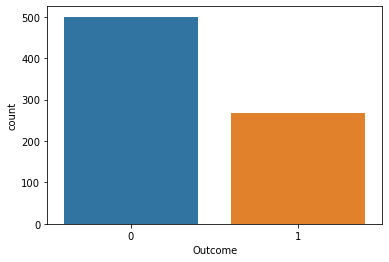

In [5]:
ax = sns.countplot(x="Outcome", data=df_diab,)

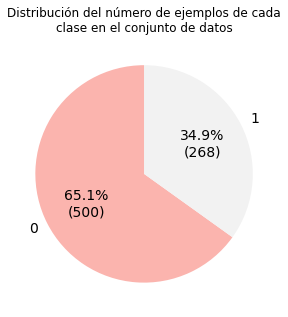

In [6]:
conteo_clase.plot(kind='pie', 
                                    figsize=(5, 5),
                                    #autopct='%1.1f%%',  #Esto muestra úicamente el porcentaje de ejemplos de cada categoría en el gráfico. 
                                    autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*conteo_clase.sum())), #Con esta función lambda se puede mostrar el porcentaje y el número absoluto de ejemplos en cada categoría. 
                                    startangle=90,       #Esto define la orientación de la línea vertical inicial de las divisiones del pie chart.
                                    fontsize=14,         #Tamaño de los textos.         
                                    cmap='Pastel1')      #Para otros color maps visite: https://matplotlib.org/stable/tutorials/colors/colormaps.html
titulo = 'Distribución del número de ejemplos de cada\nclase en el conjunto de datos'
plt.title(titulo) 
plt.ylabel('')
plt.show()

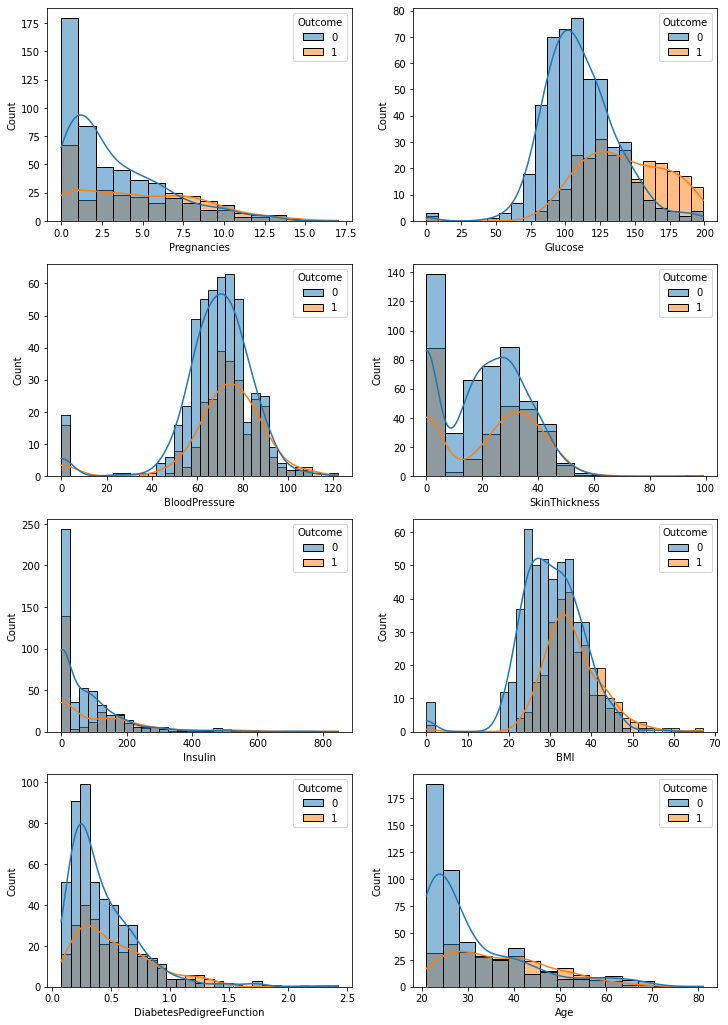

In [7]:
fig, axes = plt.subplots(4, 2, figsize=(12, 18))
sns.histplot(ax=axes[0,0],x=df_diab['Pregnancies'],kde=True,hue=df_diab['Outcome'])
sns.histplot(ax=axes[0,1],x=df_diab['Glucose'],kde=True,hue=df_diab['Outcome'])
sns.histplot(ax=axes[1,0],x=df_diab['BloodPressure'],kde=True,hue=df_diab['Outcome'])
sns.histplot(ax=axes[1,1],x=df_diab['SkinThickness'],kde=True,hue=df_diab['Outcome'])
sns.histplot(ax=axes[2,0],x=df_diab['Insulin'],kde=True,hue=df_diab['Outcome'])
sns.histplot(ax=axes[2,1],x=df_diab['BMI'],kde=True,hue=df_diab['Outcome'])
sns.histplot(ax=axes[3,0],x=df_diab['DiabetesPedigreeFunction'],kde=True,hue=df_diab['Outcome'])
sns.histplot(ax=axes[3,1],x=df_diab['Age'],kde=True,hue=df_diab['Outcome'])
plt.show()

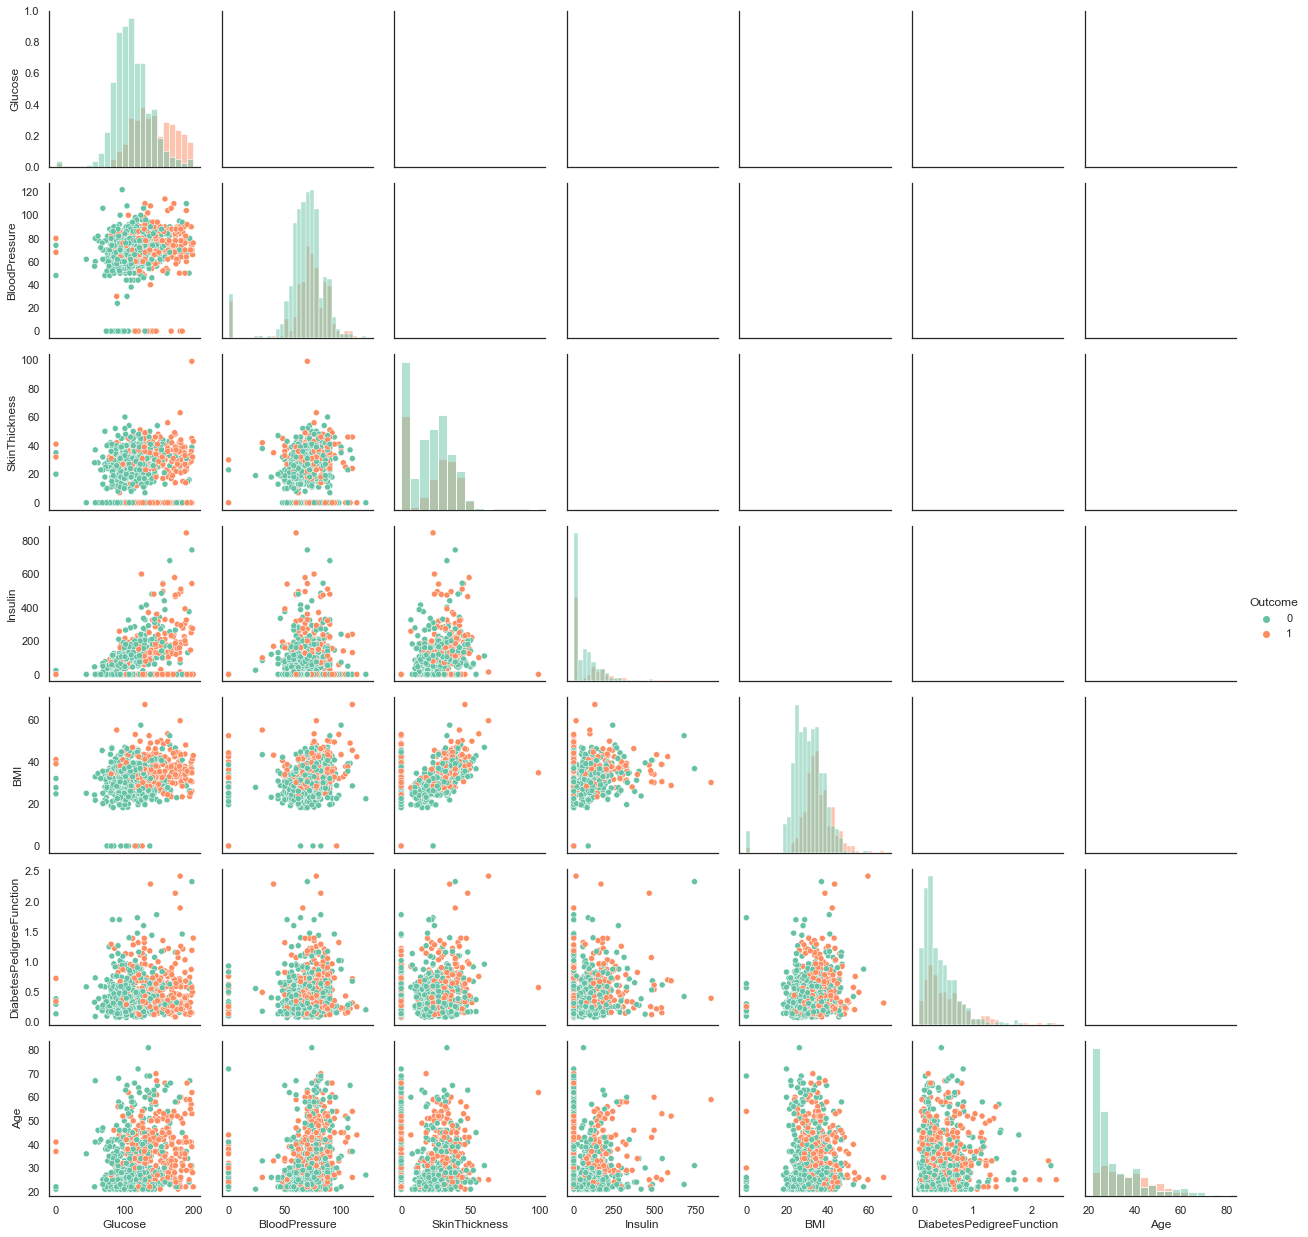

In [8]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df_diab.iloc[:,1:],hue='Outcome',diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()

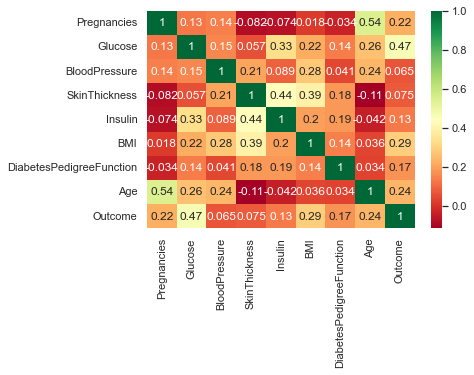

In [9]:
ax = sns.heatmap(df_diab.corr(),annot=True,cmap='RdYlGn')

In [12]:
#Nombre de los posibles atributos de entrada:
# 0   Pregnancies 
# 1   Glucose (tiene ceros)
# 2   BloodPressure (tiene ceros)
# 3   SkinThickness (tiene ceros)
# 4   Insulin (tiene ceros)
# 5   BMI (tiene ceros)
# 6   DiabetesPedigreeFunction
# 7   Age

atributo = "Insulin"
n_rows, n_cols = df_diab.shape
count = (df_diab[atributo] == 0).sum()
print("Número de valores 0: ", count)
print("Porcentaje de valores cero en atributo " + atributo + ": %.2f" % (100*count/n_rows))

Número de valores 0:  374
Porcentaje de valores cero en atributo Insulin: 48.70


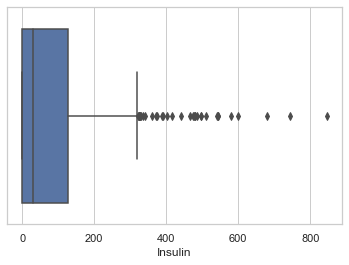

In [13]:
sns.set_theme(style="whitegrid")

#atributo = "Pregnancies"
#atributo = "Glucose"
#atributo = "BloodPressure"
#atributo = "SkinThickness"
atributo = "Insulin"
#atributo = "BMI"
#atributo = "DiabetesPedigreeFunction"
#atributo = "Age"

ax = sns.boxplot(x=df_diab[atributo])